<a href="https://colab.research.google.com/github/walukas1/DeepDiveDSProjects/blob/main/Project_4_Spotify_Walukas%20v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 4: Predicting popularity on Spotify

---
---
## Problem Definition
Predict whether a song will be popular on spotify


###Guiding questions
- What is the business problem?  Often some variant of saving time, saving money, and/or making money.
  - predict whether or not a future customer will make a transaction based on their transaction data.
- What data science problem is this? ( supervised or unsupervised )

- If supervised ...
  - how did you determine what is the target? What is the target?
  - what statistical data type is the target: numerical or categorical?
  - would this be a classification or a regression problem?
- If unsupervised ...
  - what kind of clustering problem?




---
---
## Data Collection/Sources


###Guiding questions
- where is the data source located: local file, database, website, API, other?
  - https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv

- where is the data dictionary?
- how many bytes ( KB, MB, GB, TB ) is the data set?
- what tools did/would you use to get and read the data?
  - pandas, numpy and matplot lib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics, model_selection
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

Load training data as csv file and convert to data frame

In [ ]:
train_path = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv'
train = pd.read_csv(train_path)

In [ ]:
train.shape

(1556, 23)

In [ ]:
train.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


##IDA




Guiding Questions
- how can/did you discover how many rows?
- how can/did you discover how many columns?
- how can/did you discover if there are any unique identifiers and how would/did you handle them?
- how can/did you discover if there are any nulls and how would/did you handle them?
- if supervised, how can/did you discover if there are any nulls in your target and how would/did you handle them?
- how can/did you discover if there are any duplicates and how would/did you handle them?
- how can/did you discover if there are any missing values and how would/did you handle them?
- how can/did you discover if there are any nested fields and how would/did you handle them?

##Deciding target column
between ['Highest Charting Position','Streams','Popularity','Weeks Charted']

In [ ]:
train.columns

Index(['Index', 'Highest Charting Position', 'Number of Times Charted',
       'Week of Highest Charting', 'Song Name', 'Streams', 'Artist',
       'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       'Chord'],
      dtype='object')

In [ ]:
pop_columns = ['Highest Charting Position','Number of Times Charted','Weeks Charted','Streams','Popularity']
pop_df = train[pop_columns]
pop_cate= pd.DataFrame()

In [ ]:
pop_cate['Nulls'] = pop_df.isnull().sum()
pop_cate['Duplicates'] = pop_df.duplicated().sum()
pop_cate['Uniques'] = pop_df.nunique()
pop_cate['Dtype'] = pop_df.dtypes
pop_cate['Sample data'] = pop_df.iloc[0]

In [ ]:
for i in pop_columns:
  print(pop_df[i].value_counts())

Highest Charting Position
1      18
2      18
5      17
15     15
22     15
       ..
98      2
173     2
165     2
200     2
178     1
Name: count, Length: 200, dtype: int64
Number of Times Charted
1     509
2     149
3     110
4      77
5      71
     ... 
74      1
47      1
77      1
56      1
84      1
Name: count, Length: 75, dtype: int64
Weeks Charted
2020-12-18--2020-12-25                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [ ]:
pop_cate

,Nulls,Duplicates,Uniques,Dtype,Sample data
Highest Charting Position,0,0,200,int64,1
Number of Times Charted,0,0,75,int64,8
Weeks Charted,0,0,775,object,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...
Streams,0,0,1556,object,"48,633,449"
Popularity,0,0,70,object,100


In [ ]:
# CONVET OBJECT STRING NUMBERS TO INTS

# Convert Streams to int
stream = train['Streams']
train['StreamINT'] = stream.str.replace(",", "", regex=False)
train['StreamINT'] = train['StreamINT'].astype(int)

train['StreamINT'].dtypes

dtype('int64')

In [ ]:
train['StreamINT'].describe()

,StreamINT
count,1.556000e+03
mean,6.340219e+06
std,3.369479e+06
min,4.176083e+06
25%,4.915322e+06
50%,5.275748e+06
75%,6.455044e+06
max,4.863345e+07


How skewed is the streams data and how would we normalize that??

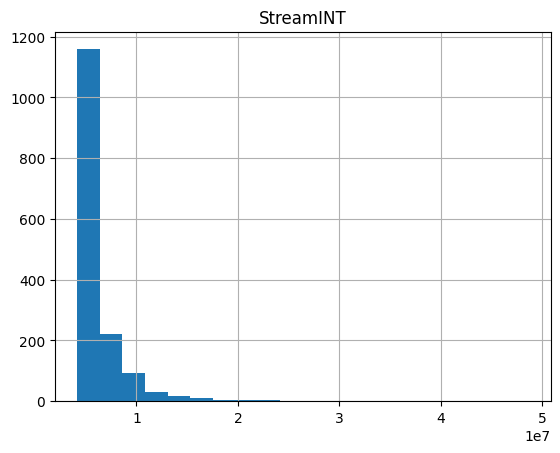

In [ ]:
pop_columns_updated = ['StreamINT']
for i in pop_columns_updated:
  train[i].hist(bins = 20)
  plt.title(i)
  plt.show()

In [ ]:
#First peek into data
import pandas as pd
def IDA(df, target,null_upper_lim, null_lower_lim):
  ''' This function returns the following information after inputting the data frame and identifying the target column where df must be a data frame and target must be a string name of column
null_upper_lim in decimal percent (0.4 = 40%) defines the threshhold of null data in feature in which more than will suggest to delete the column (think of better wording later)
null_lower_lim in decimal percent (0.02 = 2%) defines the threshhold of null data in a fueature in which less than it will suggest columns to delete rows in it that has nulls

Returns dict_keys(['DF rows', 'DF Columns', 'Total Nulls', 'Duplicate rows', 'meta_df', 'Target Name', 'Target count', 'Target Nulls', 'Target type', 'Drop columns', 'Drop rows'])
'''


#Check dataframe for size, shape, nulls and duplicates
  rows, columns = df.shape
  df_nulls = df.isnull().sum().sum()
  duplicates = df.duplicated().sum()
  meta_dict = {'DF rows' : rows, 'DF Columns' : columns, 'Total Nulls': df_nulls, 'Duplicate rows':duplicates}
  # print('--- Features Type, Uniques and Null Counts ---')
  meta_dict['meta_df'] = pd.concat([df.dtypes, df.nunique(), df.isnull().sum()], keys = ['Dtype', 'Uniques','Null Sum'], axis = 1)

# # Check target data
  target_nulls = df[target].isnull().sum()
  target_count = df[target].count()
  target_type = type(df[target][1])
  meta_dict.update([('Target Name',target),('Target count', target_count),('Target Nulls',target_nulls), ('Target type',target_type)])

  # print('--- Target Describe and Histogram ---')
  # print(df[target].describe().transpose())
  # target_plt = plt.hist(df[target], bins=20, label = target)
  # plt.title(target)
  # meta_dict['Target plt'] = target_plt

#Suggest columns and rows to drop based on nulls
  #Find location of nulls missing {null_upper_lim}% of data set
  filter_c = df.isnull().sum() > rows * null_upper_lim
  df_nulls = df.isnull().sum()
  drop_columns = df_nulls[filter_c]
  #Categories with only a few nulls ({null_lower_lim} % mising threshhold)
  filter_r = (df.isnull().sum() > 0) & (df.isnull().sum() < rows * null_lower_lim)
  drop_rows = df_nulls[filter_r]
  meta_dict.update([('Drop columns',drop_columns),('Drop rows',drop_rows)])
  return(meta_dict)

In [ ]:
target = 'StreamINT'
meta_dict = IDA(train, target, 0.4,0.02)
meta_dict

{'DF rows': 1556,
 'DF Columns': 24,
 'Total Nulls': 0,
 'Duplicate rows': 0,
 'meta_df':                             Dtype  Uniques  Null Sum
 Index                       int64     1556         0
 Highest Charting Position   int64      200         0
 Number of Times Charted     int64       75         0
 Week of Highest Charting   object       83         0
 Song Name                  object     1556         0
 Streams                    object     1556         0
 Artist                     object      716         0
 Artist Followers           object      600         0
 Song ID                    object     1517         0
 Genre                      object      395         0
 Release Date               object      478         0
 Weeks Charted              object      775         0
 Popularity                 object       70         0
 Danceability               object      530         0
 Energy                     object      575         0
 Loudness                   object     1394    

In [ ]:
meta_dict.keys()

dict_keys(['DF rows', 'DF Columns', 'Total Nulls', 'Duplicate rows', 'meta_df', 'Target Name', 'Target count', 'Target Nulls', 'Target type', 'Drop columns', 'Drop rows'])

In [ ]:
meta_dict['DF Columns']

24

---
---
## Data Cleaning


###Guiding Questions
- if supervised, what data type is your target?  What does that suggest for the type of ML process you will use?
- what is the distribution of values for your target?
- how can/did you discover which fields are categorical?
- how can/did you discover which fields are numerical?
- for each field, what is the distribution?
- how can/did you discover the relationship between any two variables?




Suggest columns to drop

In [ ]:
train.dtypes
drop_cols = [
    'Index', 'Streams',
    'Highest Charting Position', 'Number of Times Charted', 'Week of Highest Charting', 'Artist Followers', 'Weeks Charted', 'Popularity']
drop_cols

['Index',
 'Streams',
 'Highest Charting Position',
 'Number of Times Charted',
 'Week of Highest Charting',
 'Artist Followers',
 'Weeks Charted',
 'Popularity']

Make a copy of data frame

In [ ]:
tidy_train = train.copy()
tidy_train_bak = tidy_train.copy()
tidy_train.head(n=1)

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,StreamINT
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B,48633449


Drop columns or rows

In [ ]:
tidy_train.drop(drop_cols,axis = 'columns', inplace = True)

In [ ]:
tidy_train.columns

Index(['Song Name', 'Artist', 'Song ID', 'Genre', 'Release Date',
       'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
       'Liveness', 'Tempo', 'Duration (ms)', 'Valence', 'Chord', 'StreamINT'],
      dtype='object')

In [ ]:
tidy_train['Energy'].value_counts() #Shows 11 blanks in Energy
drop_rows = tidy_train[tidy_train['Energy'].str.isspace()]
drop_rows.index

Index([35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538], dtype='int64')

In [ ]:
tidy_train.drop(drop_rows.index, axis = 0, inplace= True)
tidy_train.shape

(1545, 16)

In [ ]:
conv_dict = {
    int : ['Duration (ms)'],
    float : ['Danceability', 'Energy',
             'Loudness', 'Speechiness',
             'Acousticness','Liveness',
             'Tempo','Valence'],
    str : ['Song Name', 'Artist',
           'Song ID', 'Chord' ],
    # list : ['Genre']
}

In [ ]:
convert_train= pd.DataFrame()
for k in conv_dict:
  for i in conv_dict[k]:
    convert_train[i]=tidy_train[i].astype(dtype = k)
convert_train.dtypes

,0
Duration (ms),int64
Danceability,float64
Energy,float64
Loudness,float64
Speechiness,float64
Acousticness,float64
Liveness,float64
Tempo,float64
Song Name,object
Artist,object


In [ ]:
type(tidy_train['Song Name'][1])

str

In [ ]:
 convert_train['Streams']=tidy_train['StreamINT']
 convert_train.dtypes

,0
Duration (ms),int64
Danceability,float64
Energy,float64
Loudness,float64
Speechiness,float64
Acousticness,float64
Liveness,float64
Tempo,float64
Song Name,object
Artist,object


Histograms of all variables

Checking the normal distribution of each variable?

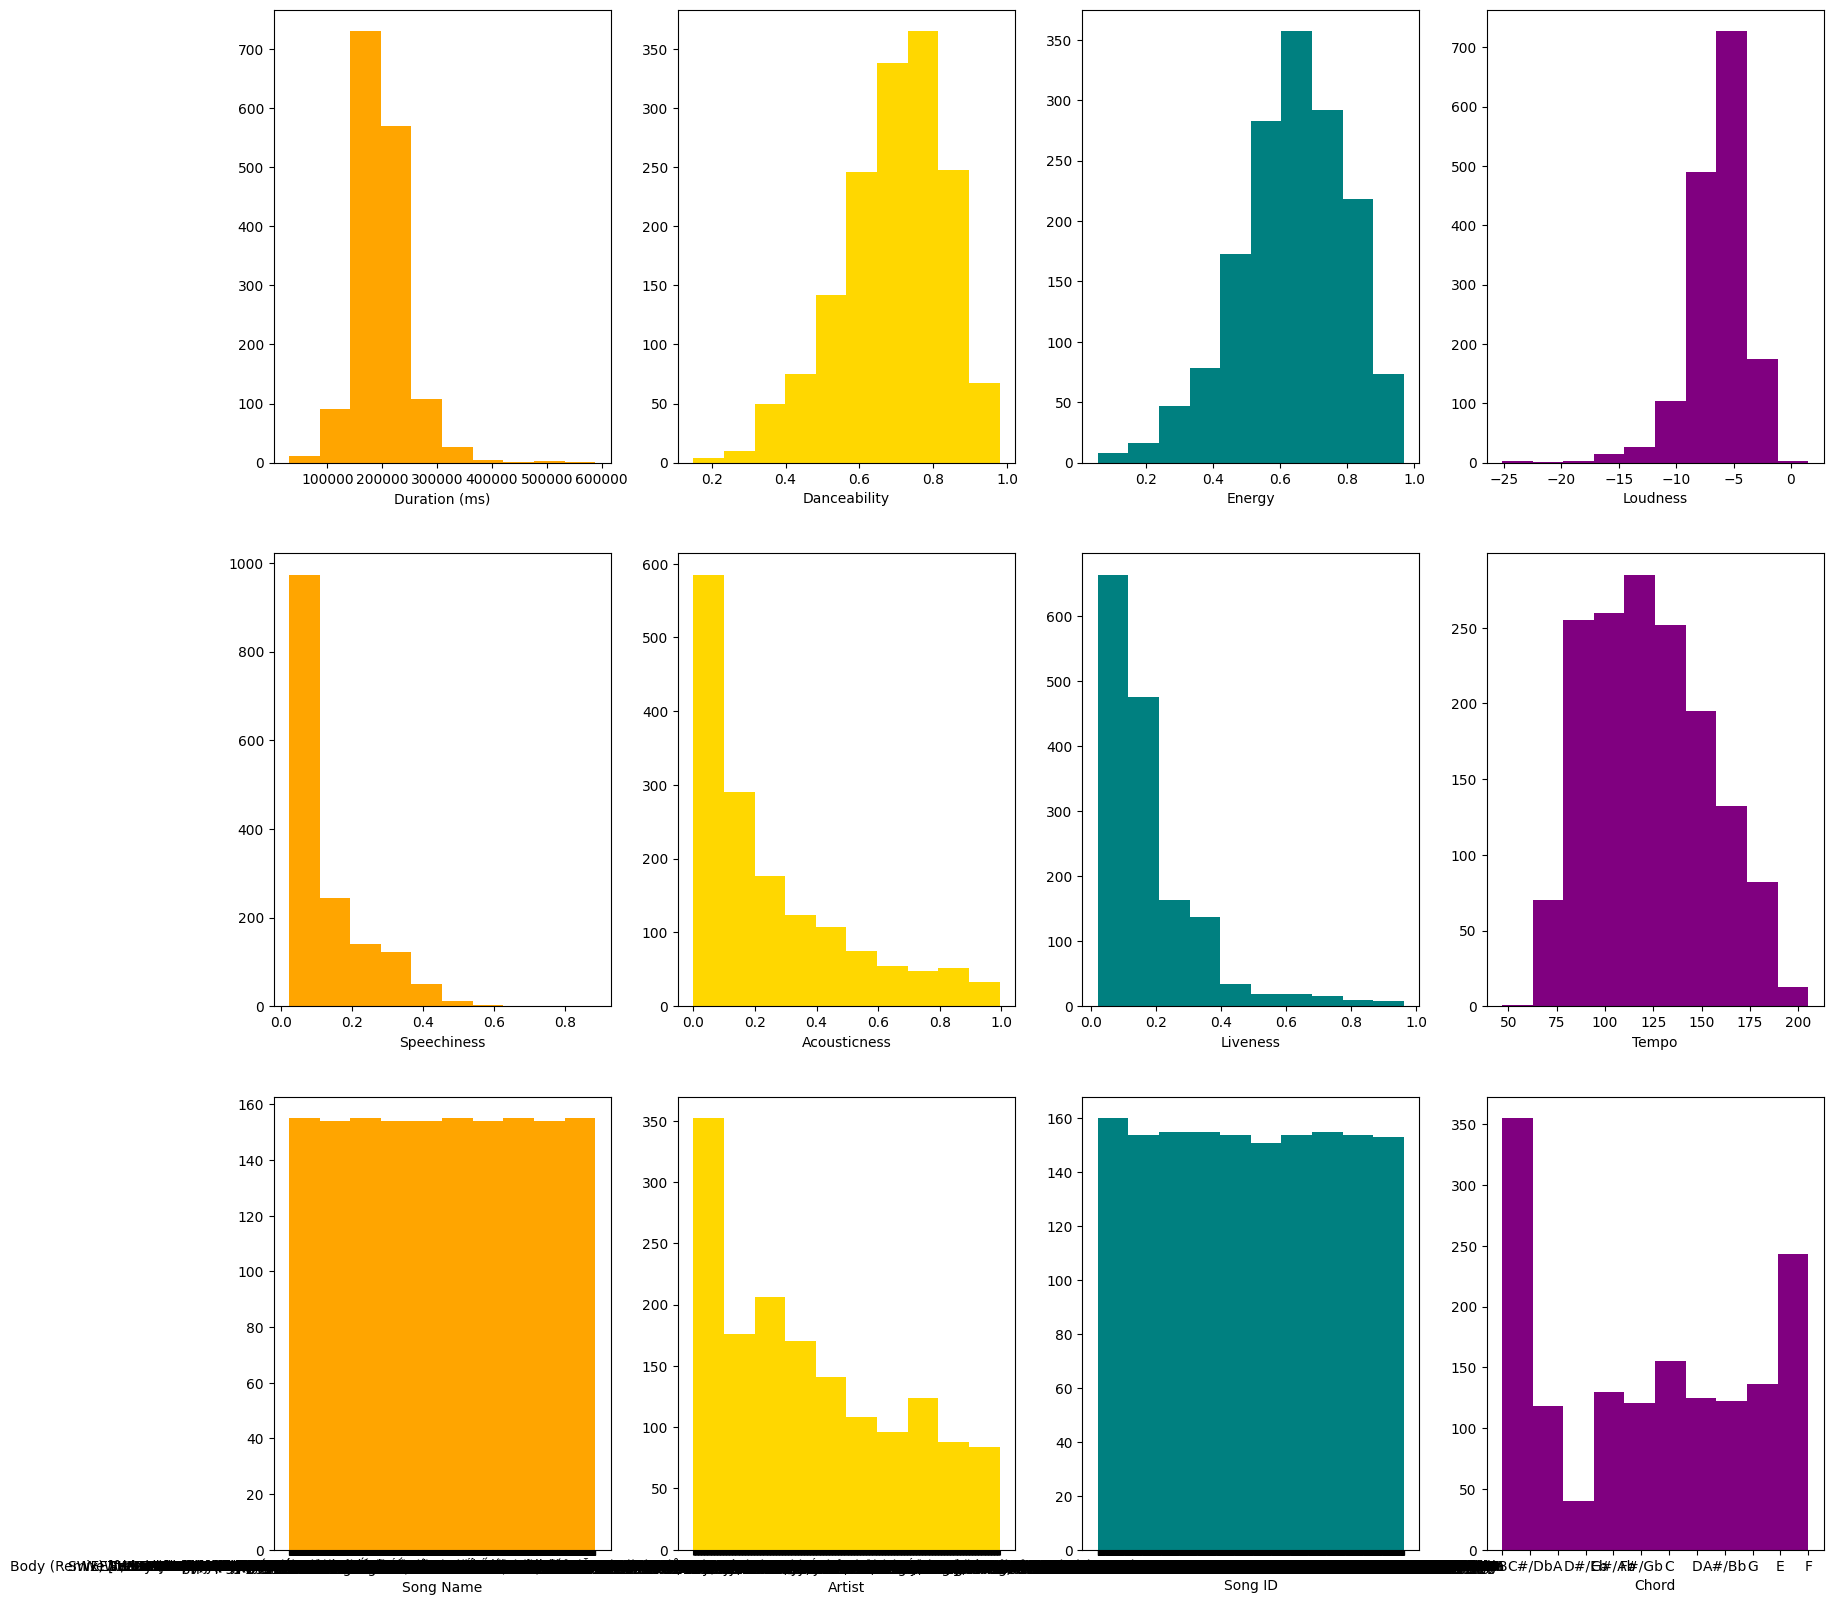

In [ ]:
fig, axs = plt.subplots(nrows = 3, ncols = 4, figsize = (20,20))
colors = ['orange', 'gold', 'teal','purple']

n = 0
for i in range(3):
  for j in range(4):
    column = convert_train.columns[n]
    axs[i,j].hist(convert_train[column], color = colors[n % 4], bins=10)
    axs[i,j].set_xlabel(column)
    n += 1

Correlation heat map/Pair plot if low # of variables

Check the correlation values between all predictor columns to ensure there are no substantial correlations between predictors. This is important to support the decision to classify the ‘target’ using Naïve Bayes.

In [ ]:
simple_train = convert_train.drop(['Artist','Song Name','Chord','Song ID'], axis= 1, inplace = False)
keydf=pd.DataFrame()
keydf['Song ID']= tidy_train['Song ID']
keydf

,Song ID
0,3Wrjm47oTz2sjIgck11l5e
1,5HCyWlXZPP0y6Gqq8TgA20
2,4ZtFanR9U6ndgddUvNcjcG
3,6PQ88X9TkUIAUIZJHW2upE
4,27NovPIUIRrOZoCHxABJwK
...,...
1551,2ekn2ttSfGqwhhate0LSR0
1552,2PWjKmjyTZeDpmOUa3a5da
1553,1rfofaqEpACxVEHIZBJe6W
1554,5F8ffc8KWKNawllr5WsW0r


In [ ]:
simple_train.head()

,Duration (ms),Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Streams
0,211560,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,48633449
1,141806,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,47248719
2,178147,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,40162559
3,231041,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,37799456
4,212000,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,33948454


In [ ]:
corr = simple_train.corr()
corr

,Duration (ms),Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Streams
Duration (ms),1.000000,-0.101390,0.056624,0.075262,-0.089895,-0.046010,0.019685,-0.004671,0.015964
Danceability,-0.101390,1.000000,0.142130,0.234928,0.237394,-0.316798,-0.114518,-0.040219,-0.081291
Energy,0.056624,0.142130,1.000000,0.732616,0.023989,-0.542399,0.124693,0.113352,0.004145
Loudness,0.075262,0.234928,0.732616,1.000000,-0.018823,-0.477431,0.043141,0.104371,-0.031155
Speechiness,-0.089895,0.237394,0.023989,-0.018823,1.000000,-0.131436,0.072774,0.111255,-0.062620
Acousticness,-0.046010,-0.316798,-0.542399,-0.477431,-0.131436,1.000000,-0.005469,-0.061632,0.034054
Liveness,0.019685,-0.114518,0.124693,0.043141,0.072774,-0.005469,1.000000,-0.018265,0.042105
Tempo,-0.004671,-0.040219,0.113352,0.104371,0.111255,-0.061632,-0.018265,1.000000,0.053458
Streams,0.015964,-0.081291,0.004145,-0.031155,-0.062620,0.034054,0.042105,0.053458,1.000000


<Axes: >

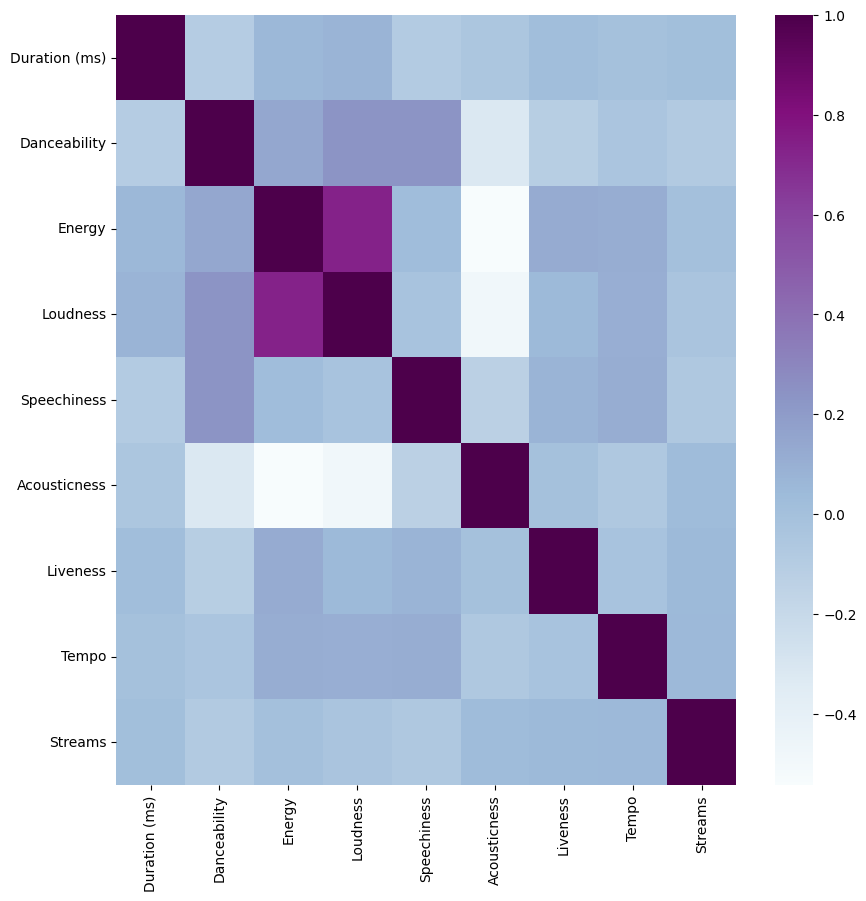

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='BuPu')

Check for correlation with target


In [ ]:
corr['Streams']

,Streams
Duration (ms),0.015964
Danceability,-0.081291
Energy,0.004145
Loudness,-0.031155
Speechiness,-0.062620
Acousticness,0.034054
Liveness,0.042105
Tempo,0.053458
Streams,1.000000


In [ ]:
#Correlation Pair Table
mask = np.triu(np.ones_like(corr, dtype=bool))
lower_triangle = corr.mask(mask)
corr_pair = (
  lower_triangle[ lower_triangle.abs() > 0.40]
  .drop( "Streams" )
  .unstack()
  .dropna()
  .sort_values( ascending = False )
)

corr_pair.reset_index()
corr_pair.rename({'0' : "Correlation"})

,,0
Energy,Loudness,0.732616
Loudness,Acousticness,-0.477431
Energy,Acousticness,-0.542399


In [ ]:
simple_train.drop(['Energy'],axis = 1, inplace = True)
simple_train.columns

Index(['Duration (ms)', 'Danceability', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Streams'],
      dtype='object')

---
---
## Processing


- what questions did you ask to determine which ML process to use?
  - NB (assumes normal distribution of predictors)
- how did/can you determine what performance metric to use?  What others could you have used?  Which metrics might not be appropriate?
- how did/can you account for the variance/bias trade-off?









THREE ROUNDS OF THIS

D tree
random forest
XGboost

In [ ]:
y = simple_train['Streams'] #Target data frame (y)
X = simple_train.drop('Streams', axis=1, inplace=False)#Train dataframe (x)

numLoops = 500

RMSE = {}

###Descision Tree 1

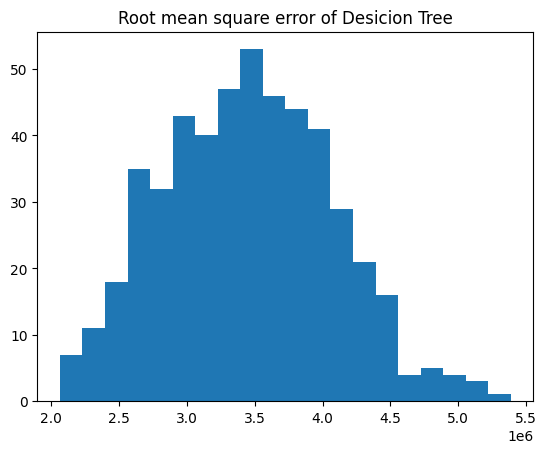

In [ ]:
# Decision tree
rms_error = np.zeros(numLoops)

for idx in range(numLoops):
  model = DecisionTreeRegressor(max_depth=3)  # make a model
  X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2) #split data (x = featutes, y= target)
  model.fit(X_train,y_train) #fit model
  y_pred = model.predict(X_test) # predict
  rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred)) #measure accuracy
RMSE['Descision Tree'] = round(rms_error.mean(), 2)
plt.hist(rms_error, bins = 20)
plt.title('Root mean square error of Desicion Tree')
plt.show()

In [ ]:
RMSE

{'Descision Tree': 3452647.66}

###Random Forest 1

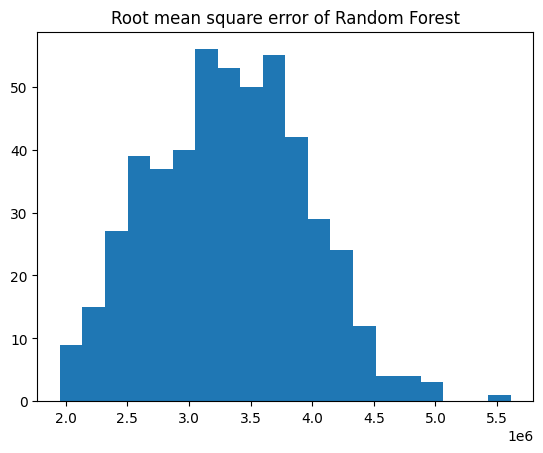

In [ ]:
# RandomForestRegressor
rms_error = np.zeros(numLoops)

for idx in range(numLoops):
  model = RandomForestRegressor(max_depth=3)  # make a model
  X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2) #split data (x = featutes, y= target)
  model.fit(X_train,y_train) #fit model
  y_pred = model.predict(X_test) # predict
  rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred)) #measure accuracy
RMSE['Random Forest'] = round(rms_error.mean(), 2)
plt.hist(rms_error, bins = 20)
plt.title('Root mean square error of Random Forest')
plt.show()

In [ ]:
RMSE

{'Descision Tree': 3452647.66, 'Random Forest': 3325235.89}

### XGBoost process

In [ ]:
# xgb
## From https://colab.research.google.com/drive/1DdEK2Emep244zUEG_KpzDNI8Ij-4s_NS#scrollTo=r1uQqSv0j8OI
numLoops = 100
mse_xgb  = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15)
  xgbr = xgb.XGBRegressor(objective ='reg:squarederror', verbosity=0, seed = 10)
  xgbr.fit(X_train,y_train)
  y_pred_xgb = xgbr.predict(X_test)
  mse_xgb[idx] = mean_squared_error(y_test,y_pred_xgb)

RMSE['XGBoost 1'] = np.sqrt(mse_xgb).mean()
RMSE

{'Descision Tree': 3452647.66,
 'Random Forest': 3325235.89,
 'XGBoost 1': 3663261.9192317617}

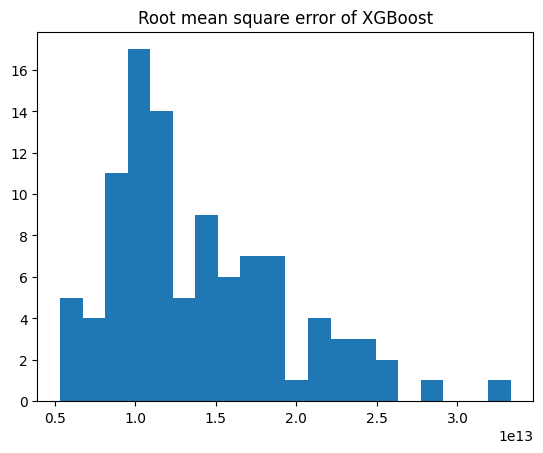

In [ ]:
plt.hist(mse_xgb, bins = 20)
plt.title('Root mean square error of XGBoost')
plt.show()

XGBoost finding best parameters

In [ ]:
# Specify the parameters you want to try and their ranges.
param_test = {
 'max_depth'     : [ 3, 4, 5, 6, 7 ],
 'learning_rate' : [ 0.1, 0.2, 0.3, 0.4 ],
 'n_estimators'  : [ 20, 40, 60, 80, 100, 120, 140 ],
}

# Perform the grid search
gsearch = GridSearchCV(
    estimator = xgb.XGBRegressor( objective = 'reg:squarederror', seed = 10 ),
    param_grid = param_test,
    scoring = 'neg_mean_squared_error',
    cv = 5,
)

# Fit to training data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05, random_state = 42 )
model = gsearch.fit(X_train,y_train)

# See grid search results
print(model.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 20}


Run XGBoost with these suggested params

In [ ]:
numLoops = 100
mse_xgb  = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.15 )
  xgbr = xgb.XGBRegressor(
      objective ='reg:squarederror',
      verbosity=0,
      learning_rate = 0.1,
      max_depth = 3,
      n_estimators = 20,
      seed = 10,
  )
  xgbr.fit(X_train,y_train)
  y_pred_xgb = xgbr.predict(X_test)
  mse_xgb[idx] = mean_squared_error(y_test,y_pred_xgb)

RMSE['XGBoost 2'] = np.sqrt(mse_xgb).mean()

Parameters all seemed to be on the lower end. Run again with finer range of parameters

In [ ]:
# Specify the parameters you want to try and their ranges.
param_test = {
 'max_depth'     : [ 2,3,4 ],
 'learning_rate' : [ 0.05,0.1,0.15,0.2 ],
 'n_estimators'  : [ 5,10,15,20,30, 40 ],
}

# Perform the grid search
gsearch = GridSearchCV(
    estimator = xgb.XGBRegressor( objective = 'reg:squarederror', seed = 10 ),
    param_grid = param_test,
    scoring = 'neg_mean_squared_error',
    cv = 5,
)

# Fit to training data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state = 42 )
model = gsearch.fit(X_train,y_train)

# See grid search results
print(model.best_params_)

{'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 5}


Run XGBoost again with more specific suggested params

In [ ]:
numLoops = 100
mse_xgb  = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.15 )
  xgbr = xgb.XGBRegressor(
      objective ='reg:squarederror',
      verbosity=0,
      learning_rate = 0.15,
      max_depth = 3,
      n_estimators = 5,
      seed = 10,
  )
  xgbr.fit(X_train,y_train)
  y_pred_xgb = xgbr.predict(X_test)
  mse_xgb[idx] = mean_squared_error(y_test,y_pred_xgb)

RMSE['XGBoost 3'] = np.sqrt(mse_xgb).mean()

In [ ]:
RMSE

{'Descision Tree': 3452647.66,
 'Random Forest': 3325235.89,
 'XGBoost 1': 3663261.9192317617,
 'XGBoost 2': 3263297.573674063,
 'XGBoost 3': 3323244.6808083775}

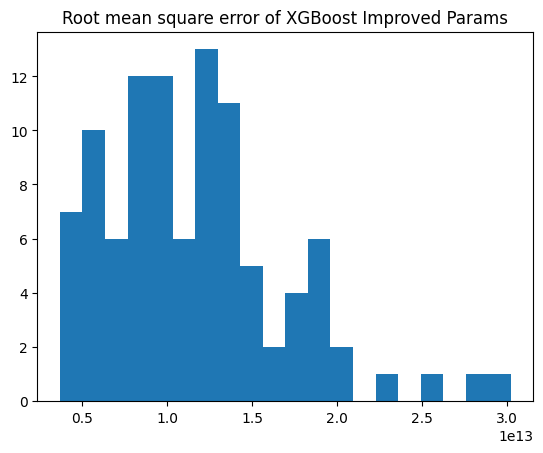

In [ ]:
plt.hist(mse_xgb, bins = 20)
plt.title('Root mean square error of XGBoost Improved Params')
plt.show()

Show most important feature based on best parameters for XGBoost

<ipython-input-121-53a9ef50f5fe>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels( ax.get_xticklabels(), rotation = 90 )


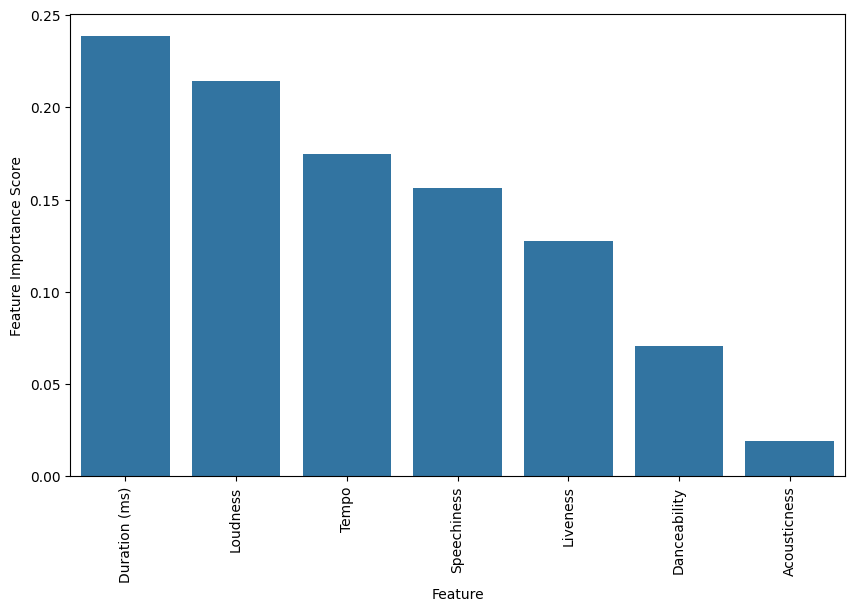

In [ ]:
feat_imp = pd.Series(xgbr.feature_importances_, index=X.columns).sort_values( ascending = False )
plt.figure(figsize = (10,6))
# ax = sns.barplot(x = feat_imp.index, y = feat_imp.values)
ax = sns.barplot(x = feat_imp.index, y = feat_imp)
ax.set_xticklabels( ax.get_xticklabels(), rotation = 90 )
plt.xlabel('Feature')
plt.ylabel('Feature Importance Score') ;

In [ ]:
(feat_imp.sort_values( ascending = False )*100).cumsum()


,0
Duration (ms),23.843449
Loudness,45.250092
Tempo,62.697609
Speechiness,78.299866
Liveness,91.050598
Danceability,98.109161
Acousticness,100.000008


###Drop least important features

Choose what to drop based on these things and then cycle through DT, RF and XGB again for the funsies

In [ ]:
drop_features = ['Acousticness','Danceability']

In [ ]:
simple_train.drop(drop_features, axis = 1, inplace = True)
simple_train.columns

Index(['Duration (ms)', 'Loudness', 'Speechiness', 'Liveness', 'Tempo',
       'Streams'],
      dtype='object')

In [ ]:
y = simple_train['Streams'] #Target data frame (y)
X = simple_train.drop('Streams', axis=1, inplace=False)#Train dataframe (x)

###Descision Tree 2

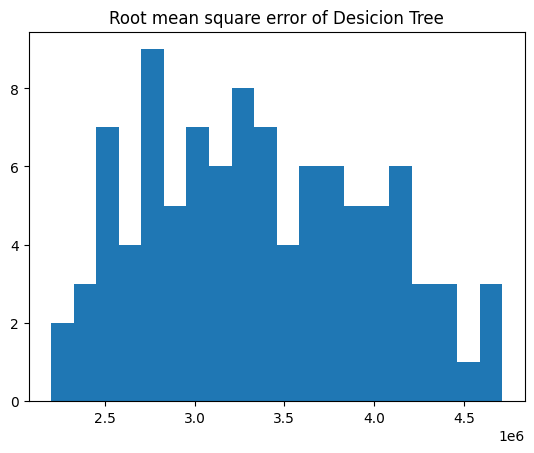

In [ ]:
# Decision tree
rms_error = np.zeros(numLoops)

for idx in range(numLoops):
  model = DecisionTreeRegressor(max_depth=3)  # make a model
  X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2) #split data (x = featutes, y= target)
  model.fit(X_train,y_train) #fit model
  y_pred = model.predict(X_test) # predict
  rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred)) #measure accuracy
RMSE['Descision Tree 2'] = round(rms_error.mean(), 2)
plt.hist(rms_error, bins = 20)
plt.title('Root mean square error of Desicion Tree')
plt.show()

In [ ]:
RMSE

{'Descision Tree': 3452647.66,
 'Random Forest': 3325235.89,
 'XGBoost 1': 3663261.9192317617,
 'XGBoost 2': 3263297.573674063,
 'XGBoost 3': 3323244.6808083775,
 'Descision Tree 2': 3370766.0}

###Random Forest 2

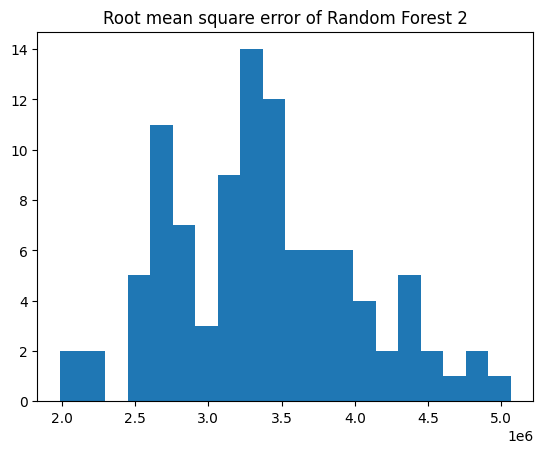

In [ ]:
# RandomForestRegressor
rms_error = np.zeros(numLoops)

for idx in range(numLoops):
  model = RandomForestRegressor(max_depth=3)  # make a model
  X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2) #split data (x = featutes, y= target)
  model.fit(X_train,y_train) #fit model
  y_pred = model.predict(X_test) # predict
  rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred)) #measure accuracy
RMSE['Random Forest 2'] = round(rms_error.mean(), 2)
plt.hist(rms_error, bins = 20)
plt.title('Root mean square error of Random Forest 2')
plt.show()

In [ ]:
RMSE

{'Descision Tree': 3452647.66,
 'Random Forest': 3325235.89,
 'XGBoost 1': 3663261.9192317617,
 'XGBoost 2': 3263297.573674063,
 'XGBoost 3': 3323244.6808083775,
 'Descision Tree 2': 3370766.0,
 'Random Forest 2': 3381142.99}

### XGBoost process 2

In [ ]:
# xgb
## From https://colab.research.google.com/drive/1DdEK2Emep244zUEG_KpzDNI8Ij-4s_NS#scrollTo=r1uQqSv0j8OI
numLoops = 100
mse_xgb  = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15)
  xgbr = xgb.XGBRegressor(objective ='reg:squarederror', verbosity=0, seed = 10)
  xgbr.fit(X_train,y_train)
  y_pred_xgb = xgbr.predict(X_test)
  mse_xgb[idx] = mean_squared_error(y_test,y_pred_xgb)

RMSE['XGBoost 2.1'] = np.sqrt(mse_xgb).mean()
RMSE

{'Descision Tree': 3452647.66,
 'Random Forest': 3325235.89,
 'XGBoost 1': 3663261.9192317617,
 'XGBoost 2': 3263297.573674063,
 'XGBoost 3': 3323244.6808083775,
 'Descision Tree 2': 3370766.0,
 'Random Forest 2': 3381142.99,
 'XGBoost 2.1': 3616979.007268448}

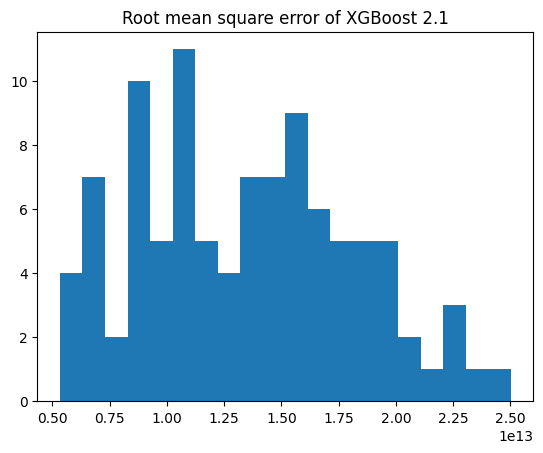

In [ ]:
plt.hist(mse_xgb, bins = 20)
plt.title('Root mean square error of XGBoost 2.1')
plt.show()

XGBoost finding best parameters

In [ ]:
# Specify the parameters you want to try and their ranges.
param_test = {
 'max_depth'     : [ 3, 4, 5, 6, 7 ],
 'learning_rate' : [ 0.1, 0.2, 0.3, 0.4 ],
 'n_estimators'  : [ 20, 40, 60, 80, 100, 120, 140 ],
}

# Perform the grid search
gsearch = GridSearchCV(
    estimator = xgb.XGBRegressor( objective = 'reg:squarederror', seed = 10 ),
    param_grid = param_test,
    scoring = 'neg_mean_squared_error',
    cv = 5,
)

# Fit to training data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05, random_state = 42 )
model = gsearch.fit(X_train,y_train)

# See grid search results
print(model.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 20}


Run XGBoost with these suggested params

In [ ]:
numLoops = 100
mse_xgb  = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.15 )
  xgbr = xgb.XGBRegressor(
      objective ='reg:squarederror',
      verbosity=0,
      learning_rate = 0.1,
      max_depth = 3,
      n_estimators = 20,
      seed = 10,
  )
  xgbr.fit(X_train,y_train)
  y_pred_xgb = xgbr.predict(X_test)
  mse_xgb[idx] = mean_squared_error(y_test,y_pred_xgb)

RMSE['XGBoost 2.2'] = np.sqrt(mse_xgb).mean()

Parameters all seemed to be on the lower end. Run again with finer range of parameters

In [ ]:
# Specify the parameters you want to try and their ranges.
param_test = {
 'max_depth'     : [ 2,3,4 ],
 'learning_rate' : [ 0.05,0.1,0.15,0.2 ],
 'n_estimators'  : [ 5,10,15,20,30, 40 ],
}

# Perform the grid search
gsearch = GridSearchCV(
    estimator = xgb.XGBRegressor( objective = 'reg:squarederror', seed = 10 ),
    param_grid = param_test,
    scoring = 'neg_mean_squared_error',
    cv = 5,
)

# Fit to training data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05, random_state = 42 )
model = gsearch.fit(X_train,y_train)

# See grid search results
print(model.best_params_)

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 15}


Run XGBoost again with more specific suggested params

In [ ]:
numLoops = 100
mse_xgb  = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.15 )
  xgbr = xgb.XGBRegressor(
      objective ='reg:squarederror',
      verbosity=0,
      learning_rate = 0.05,
      max_depth = 4,
      n_estimators = 15,
      seed = 10,
  )
  xgbr.fit(X_train,y_train)
  y_pred_xgb = xgbr.predict(X_test)
  mse_xgb[idx] = mean_squared_error(y_test,y_pred_xgb)

RMSE['XGBoost 2.3'] = np.sqrt(mse_xgb).mean()

In [ ]:
RMSE

{'Descision Tree': 3452647.66,
 'Random Forest': 3325235.89,
 'XGBoost 1': 3663261.9192317617,
 'XGBoost 2': 3263297.573674063,
 'XGBoost 3': 3323244.6808083775,
 'Descision Tree 2': 3370766.0,
 'Random Forest 2': 3381142.99,
 'XGBoost 2.1': 3616979.007268448,
 'XGBoost 2.2': 3149324.102442807,
 'XGBoost 2.3': 3278266.9197366317}

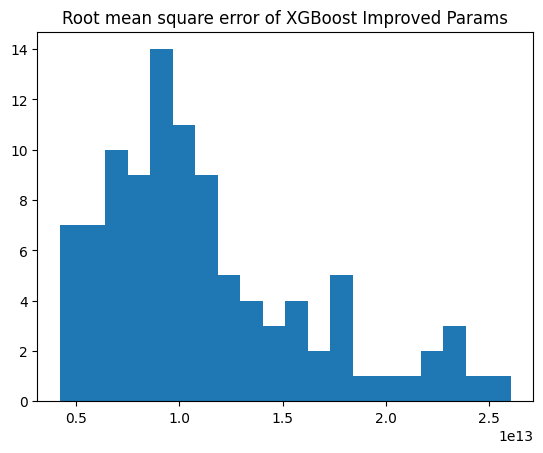

In [ ]:
plt.hist(mse_xgb, bins = 20)
plt.title('Root mean square error of XGBoost Improved Params')
plt.show()

Show most important feature based on best parameters for XGBoost

<ipython-input-138-53a9ef50f5fe>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels( ax.get_xticklabels(), rotation = 90 )


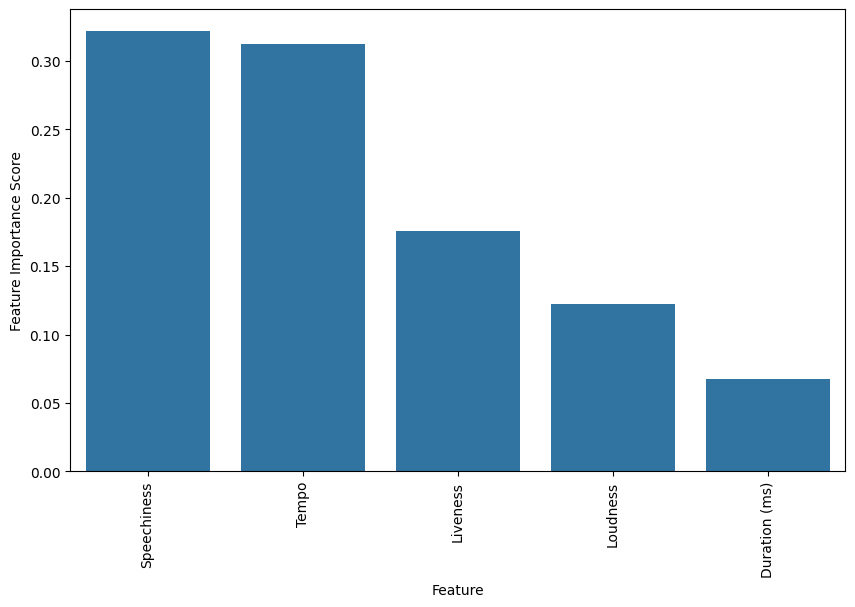

In [ ]:
feat_imp = pd.Series(xgbr.feature_importances_, index=X.columns).sort_values( ascending = False )
plt.figure(figsize = (10,6))
# ax = sns.barplot(x = feat_imp.index, y = feat_imp.values)
ax = sns.barplot(x = feat_imp.index, y = feat_imp)
ax.set_xticklabels( ax.get_xticklabels(), rotation = 90 )
plt.xlabel('Feature')
plt.ylabel('Feature Importance Score') ;

In [ ]:
(feat_imp.sort_values( ascending = False )*100).cumsum()


,0
Speechiness,32.173779
Tempo,63.452950
Liveness,81.032356
Loudness,93.255371
Duration (ms),100.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Descision Tree'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'XGBoost 1'),
  Text(3, 0, 'XGBoost 2'),
  Text(4, 0, 'XGBoost 3'),
  Text(5, 0, 'Descision Tree 2'),
  Text(6, 0, 'Random Forest 2'),
  Text(7, 0, 'XGBoost 2.1'),
  Text(8, 0, 'XGBoost 2.2'),
  Text(9, 0, 'XGBoost 2.3')])

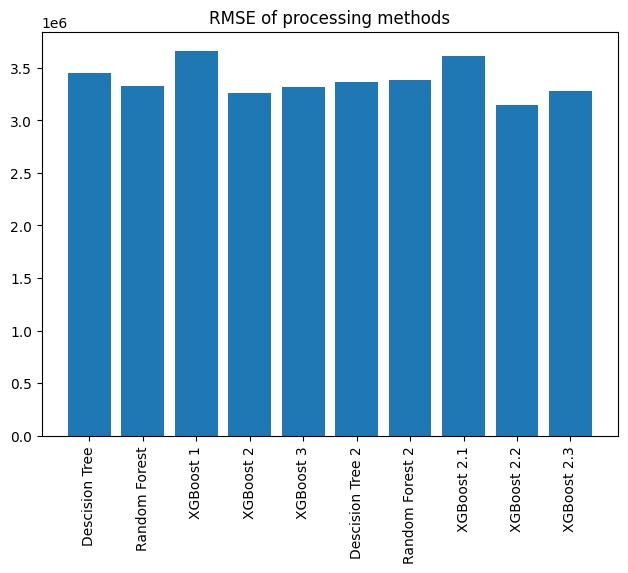

In [ ]:
plt.bar(RMSE.keys(), RMSE.values())
plt.title('RMSE of processing methods')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.xticks(rotation='vertical')